In [6]:
import matplotlib.pyplot as plt
from scipy.special import erf, erfinv
import numpy as np
C = np.array([[4, -1],[-1, 2]]) # Target covariance matrix
(l, Q) = np.linalg.eig(C)
A = Q@np.diag(np.sqrt(l))@Q.T # Transformation needed to reach target covariance matrix

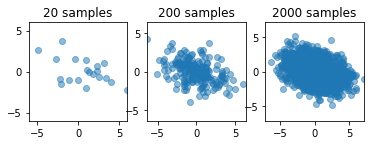

In [14]:
def estimate_cov(K, C, plot=False):
    N = 2
    X = []
    Y = []
    for n in range(K):
        x = np.random.randn(N,)
        y = A@x

        X.append(x)
        Y.append(y)

    X = np.array(X)
    Y = np.array(Y)

    Cest = (Y.T @ Y)/K
    
    if plot:
        plt.scatter(Y[:,0], Y[:,1], alpha=0.5)
        m = np.abs(Y).max()
        plt.gca().set_aspect('equal')
        plt.xlim((-m,m))
        plt.ylim((-m,m))

    return Cest, Y

plt.subplot(131)
estimate_cov(20, C, plot=True)
plt.title('20 samples')
plt.subplot(132)
estimate_cov(200, C, plot=True)
plt.title('200 samples')
plt.subplot(133)
estimate_cov(2000, C, plot=True)
plt.title('2000 samples')

None

Text(0.5, 1.0, 'Accuracy in covariance matrix estimation w.r.t. number of samples')

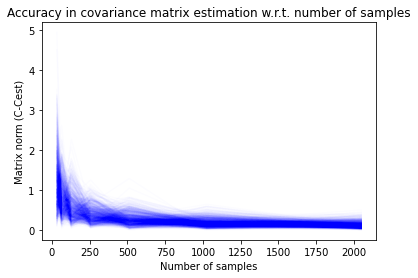

In [15]:
# Accurracy in estimation of covariance matrix 
#   w.r.t. number of samples per estimation
for _ in range(1000):
    twonorms = []
    fnorms = []
    Ks = []
    
    for pk in range(5, 12):
        K = 2**pk
        Ks.append(K)
        Cest = estimate_cov(K, C)[0]
        s = np.linalg.svd(Cest-C)[1]
        twonorms.append(s[0])
        fnorms.append(np.sum(s))
        #print(estimate_cov(K, C).round(3))

    plt.plot(Ks, twonorms, 'b', alpha=0.01)
plt.ylabel('Matrix norm (C-Cest)')
plt.xlabel('Number of samples')
plt.title('Accuracy in covariance matrix estimation w.r.t. number of samples')
#plt.plot(fnorms)